In [3]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
import numpy as np
import math
from math import atan2, pi, sqrt, cos, sin
from cmath import exp
from types import SimpleNamespace
import matplotlib
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

In [4]:
h = 6.626069e-34    # Planck constant (Js)
e = 1.602e-19      # electron charge (C)
c = 299792458       # Light celerity (m/s)
kB = 1.3806503e-23  # Boltzmann constant (kg m2/Ks2)
m_e = 9.1e-31       # electron mass (kg)

In [5]:
a = 1 ; t = 1.0 # the lattice parameter and the hopping energy
W = 28 ; L = 28 # width and length of the electronic system
#n2D = 2.4e15 # electronic density of the 2 dimensional electron gas in GaAs
Ef = 0.5
#Ef = 2*np.pi * t * (a * 1e-9)**2 * n2D # Fermi energy computed from the electronic density

In [6]:
def make_system(alat=1,W=1,L=1,t=1.0):
    graphene = kwant.lattice.honeycomb(alat,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        if (L-5)//2 < abs(x) < L//2:
            return abs(x) < L//2 and abs(y) < (W+8)//2
        return abs(x) < L//2 and abs(y) < W//2 # // = Floor division division that results into whole number 
                                               # adjusted to the left in the number line
    def lead_shape1(pos):
        x, y = pos
        return -L//10 < x < L//10
  
    def lead_shape2(pos):
        x, y = pos
        return -W//2 < y < W//2
    
    sys[graphene.shape(rectangular, (0,0))] = 0
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -t

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape2, (0, 0))] =  0
    lead0[graphene.neighbors()]= -t
    sys.attach_lead(lead0)
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((0, 1)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape1, (0, 0))] =  0
    lead1[graphene.neighbors()]=-t
    sys.attach_lead(lead1)
    
    return sys

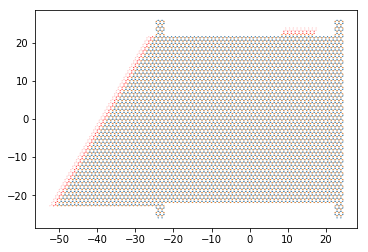

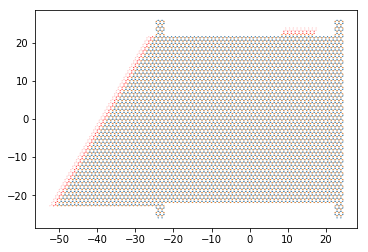

In [7]:
alat=1 ; W=45 ; L=50 ; t=1.0
sys = make_system(alat,W,L,t)

kwant.plot(sys)

In [43]:
def make_system(alat=1,W=1,L=1,t=1.0):
    graphene = kwant.lattice.honeycomb(alat,norbs=1)
    a, b = graphene.sublattices
    sys = kwant.Builder()
 
    def rectangular(pos):
        x, y = pos
        if (L-5)//2 < abs(y) < L//2:
            return abs(y) < L//2 and abs(x) < (W+15)//2
        return abs(x) < L//2 and abs(y) < W//2 # // = Floor division division that results into whole number 
                                               # adjusted to the left in the number line
    def lead_shape1(pos):
        x, y = pos
        return (L-5)//2 < abs(y) < L//2
  
    def lead_shape2(pos):
        x, y = pos
        return -W//2 < x < W//2
    
    def potential(site, pot):
        x, y = site.pos
        if 0 < y < L//2:
            return - 4*t
        else:
            return 0
        
    def onsite(site, pot):
        return 4*t + potential(site, pot)
    
    sys[graphene.shape(rectangular, (0,0))] = onsite
    hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -t

    sym0 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead0 = kwant.Builder(sym0)
    lead0[graphene.shape(lead_shape1, (0, L/2))] = 0
    lead0[graphene.neighbors()]= -t
    sys.attach_lead(lead0)
    sys.attach_lead(lead0.reversed())
    
    sym1 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead_shape1, (0, -L/2))] = 0
    lead1[graphene.neighbors()]= -t
    sys.attach_lead(lead1)
    sys.attach_lead(lead1.reversed())
    
    return sys

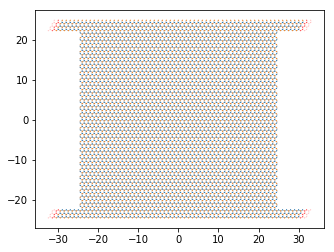

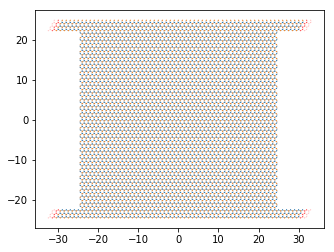

In [44]:
alat=1 ; W=45 ; L=50 ; t=1.0
sys = make_system(alat,W,L,t)
sys = sys.finalized()
kwant.plot(sys)
#ok

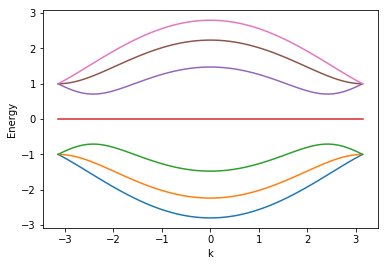

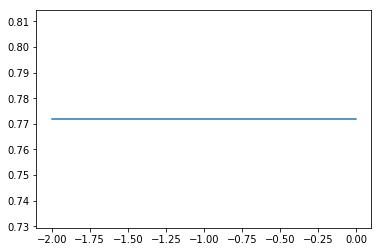

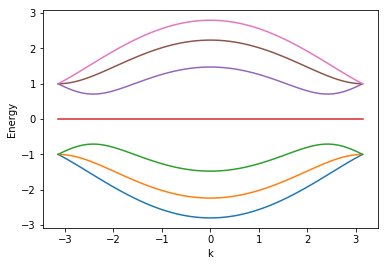

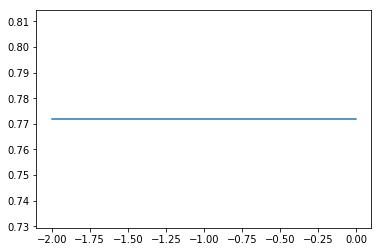

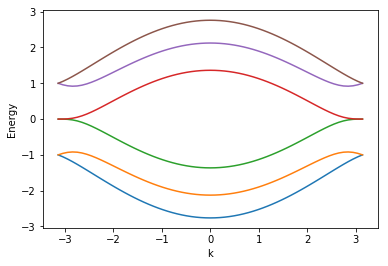

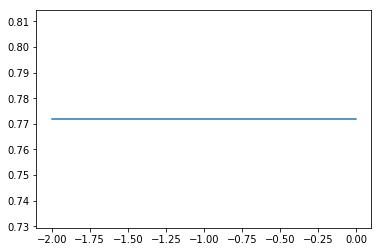

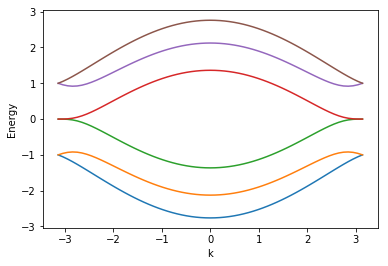

NameError: name 'potential' is not defined

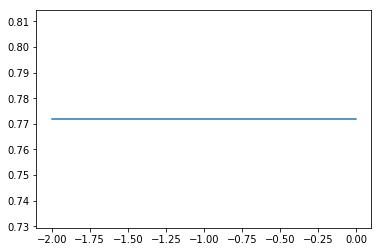

In [48]:
def plot_transmission(sys, energy, params):
    # Compute conductance
    trans = []
    for param in params:
        smatrix = kwant.smatrix(sys, energy, args=[param])
        trans.append(smatrix.transmission(1, 0))
    plt.plot(params, trans)
    #ok


for i in range (4):
    kwant.plotter.bands(sys.leads[i])
    plot_transmission(sys, 1, np.linspace(-2, 0, 51))
    
kwant.plot(potential())

IndexError: index 1 is out of bounds for axis 0 with size 0